In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
sns.set_style("whitegrid")

In [2]:
from tabgen.definitions import *
from tabgen.modelling import *
from tabgen.evaluation import DummyFrettingEvaluator

# Distribution of Fretting Possibilities

In [14]:
evaluator = DummyFrettingEvaluator()

In [10]:
configs = {
    'standard 24 frets': StringConfig(num_frets=24, string_pitches=[40, 45, 50, 55, 59, 64]),
    'drop D 24 frets': StringConfig(num_frets=24, string_pitches=[38, 45, 50, 55, 59, 64]),
    'standard 20 frets': StringConfig(num_frets=20, string_pitches=[40, 45, 50, 55, 59, 64]),
}

In [11]:
fretting_counts = {}

for name, config in configs.items():
    fretting_counts[name] = {}
    
    for pitch in range(config.min_pitch, config.max_pitch + 1):
        count = len(Pitch(pitch).get_note_frettings(config))
        if count in fretting_counts[name]:
            fretting_counts[name][count] += 1
        else:
            fretting_counts[name][count] = 1

In [19]:
distributions = pd.DataFrame(fretting_counts).fillna(0).astype(pd.np.int32).T
distributions

,1,2,3,4,5,6
drop D 24 frets,12,9,10,10,10,0
standard 20 frets,10,9,10,12,4,0
standard 24 frets,10,9,10,9,10,1


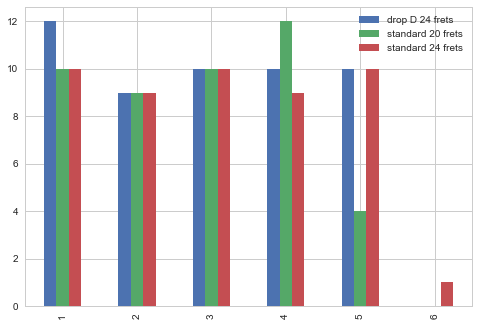

In [12]:
distributions.T.plot(kind='bar')
plt.show()

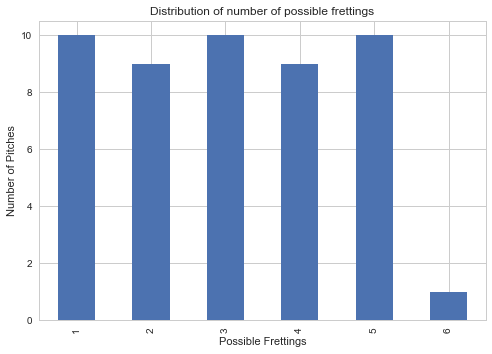

In [13]:
distributions.loc['standard 24 frets'].plot(kind='bar')
plt.title('Distribution of number of possible frettings')
plt.xlabel('Possible Frettings')
plt.ylabel('Number of Pitches')
plt.show()

In [20]:
chord_fretting_counts = {}

for name, config in configs.items():
    chord_fretting_counts[name] = {}
    
    for pitch1 in range(config.min_pitch, config.max_pitch + 1):
        for pitch2 in range(config.min_pitch, config.max_pitch + 1):
            try:
                count = len(Chord(1.0,[pitch1, pitch2], False).get_chord_frettings(config, evaluator))
                if count in chord_fretting_counts[name]:
                    chord_fretting_counts[name][count] += 1
                else:
                    chord_fretting_counts[name][count] = 1
            except NoValidFrettingException:
                pass

E:\Dokumente\MSc Data Science\_MSC\dev\tabgen\tabgen\modelling.py:456: UserWarning: Pre-filtering removed all frettings! Defaulting to all frettings.
  warnings.warn('Pre-filtering removed all frettings! Defaulting to all frettings.')


In [21]:
for key in range(max(chord_fretting_counts['standard 24 frets'].keys())):
    if key not in chord_fretting_counts['standard 24 frets']:
        chord_fretting_counts['standard 24 frets'][key] = 0

In [22]:
chord_distributions = pd.DataFrame(chord_fretting_counts).fillna(0).astype(pd.np.int32).T
chord_distributions

,0,1,2,3,4,5,6,7,8,9,10,11,12
drop D 24 frets,0,642,572,502,296,244,143,90,28,6,0,0,4
standard 20 frets,0,512,410,424,234,190,111,68,20,2,0,0,4
standard 24 frets,0,552,414,476,310,260,173,106,30,26,0,0,4


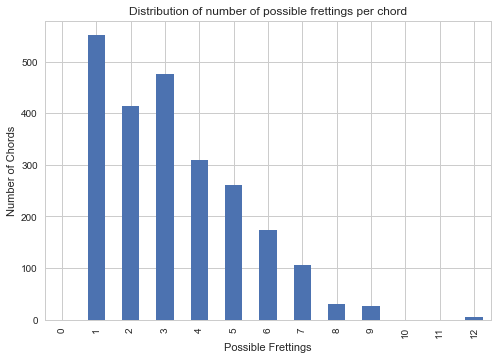

In [23]:
chord_distributions.loc['standard 24 frets'].plot(kind='bar')
plt.title('Distribution of number of possible frettings per chord')
plt.xlabel('Possible Frettings')
plt.ylabel('Number of Chords')
plt.show()

In [24]:
max(chord_fretting_counts['standard 24 frets'].keys())

12

# Sigmoid graphic for NN info

In [25]:
sigmoid = lambda x: 1.0 / (1 + math.exp(-x))

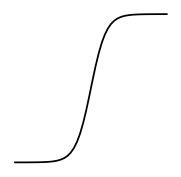

In [26]:
rr = np.linspace(-10,10)
plt.figure(figsize=(3,3))
plt.plot(rr, [sigmoid(r) for r in rr], c='k')
plt.xticks([])
plt.yticks([])
plt.box()
plt.show()

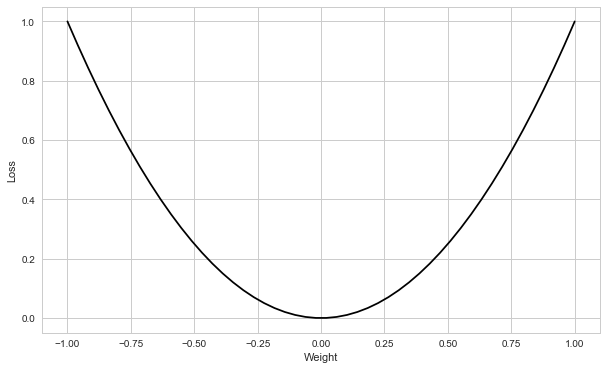

In [39]:
rr = np.linspace(-10,10)/10
plt.figure(figsize=(10,6))
plt.plot(rr, [r ** 2 for r in rr], c='k')
plt.xlabel('Weight')
plt.ylabel('Loss')
# plt.xlim((-0.75,0.75))
# plt.ylim((0, 0.6))
# plt.plot(0.6, 0.6**2, 'go', markersize=12)
plt.show()

# Plot the accuracies of models

c:\users\elias\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


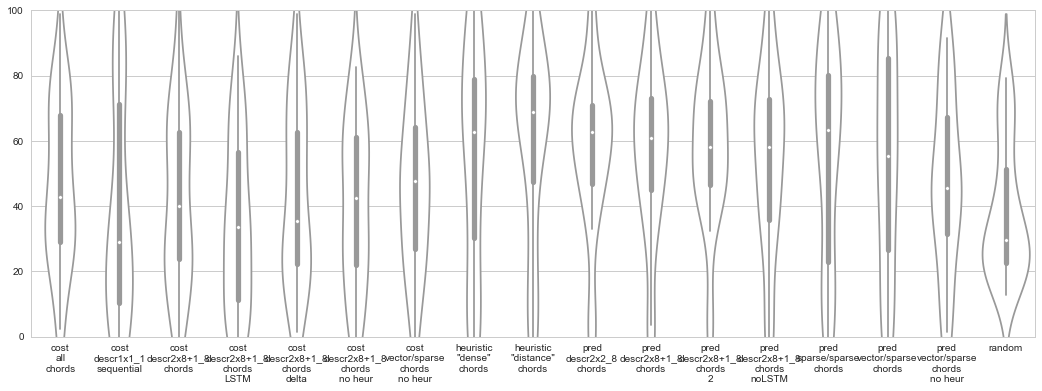

In [49]:
model_accuracies = pd.DataFrame({
    'random': [25.077399380804955, 23.58490566037736, 21.153846153846153, 39.308176100628934, 22.474747474747474, 29.746835443037973, 62.33766233766234, 64.54054054054053, 72.86821705426357, 77.13178294573643, 70.07616974972797, 21.153846153846153, 25.67049808429119, 71.9029374201788, 16.49214659685864, 22.674418604651162, 15.315315315315313, 17.117117117117118, 19.236016371077763, 35.25179856115108, 32.90653008962868, 26.548672566371685, 27.500000000000004, 16.666666666666664, 25.653206650831358, 39.26940639269406, 27.627627627627625, 79.3103448275862, 44.086021505376344, 37.77777777777778, 28.40909090909091, 60.71428571428571, 55.666666666666664, 46.833333333333336, 78.03163444639719, 12.643678160919542, 21.34502923976608, 30.473372781065088, 45.66929133858268],
    'heuristic\n"dense"\nchords': [31.57894736842105, 69.33962264150944, 48.29059829059829, 72.32704402515722, 82.07070707070707, 29.11392405063291, 59.540459540459544, 63.78378378378379, 61.240310077519375, 61.240310077519375, 71.27312295973884, 36.05769230769231, 0.0, 100.0, 1.832460732984293, 0.0, 9.90990990990991, 9.90990990990991, 6.2755798090040935, 6.330935251798561, 7.810499359795134, 94.98525073746312, 49.375, 0.0, 32.304038004750595, 100.0, 70.57057057057057, 75.86206896551724, 62.58064516129033, 68.88888888888889, 75.0, 100.0, 97.83333333333334, 97.83333333333334, 82.77680140597539, 72.41379310344827, 42.39766081871345, 83.4319526627219, 90.94488188976378],
    'heuristic\n"distance"\nchords': [52.78637770897833, 75.94339622641509, 25.64102564102564, 66.0377358490566, 79.04040404040404, 49.36708860759494, 67.33266733266733, 76.75675675675676, 81.3953488372093, 81.3953488372093, 71.9260065288357, 31.971153846153843, 0.0, 100.0, 7.853403141361256, 0.0, 9.90990990990991, 9.90990990990991, 66.84856753069577, 70.07194244604317, 24.583866837387962, 74.92625368731564, 45.208333333333336, 0.0, 56.76959619952494, 100.0, 91.29129129129129, 72.41379310344827, 63.87096774193548, 68.88888888888889, 75.0, 100.0, 80.5, 80.5, 73.81370826010544, 58.620689655172406, 80.7017543859649, 66.27218934911244, 84.64566929133859],
    # 'heuristic\n"distance"\nsequence'
    
    # === prediction-based models
    
    # plain
    # 'pred\ndescr2x8_8\nchords': [57.120743034055735, 68.39622641509435, 64.95726495726495, 84.27672955974843, 32.07070707070707, 44.303797468354425, 71.72827172827174, 73.29729729729729, 72.09302325581395, 72.09302325581395, 78.89009793253537, 43.75, 0.1277139208173691, 72.66922094508301, 56.80628272251309, 3.488372093023256, 46.846846846846844, 46.846846846846844, 2.046384720327422, 1.7266187050359711, 68.75800256081946, 52.21238938053098, 76.25, 57.09219858156028, 36.342042755344416, 31.963470319634702, 41.74174174174174, 77.58620689655173, 93.76344086021506, 71.11111111111111, 67.04545454545455, 75.0, 54.0, 54.0, 98.94551845342706, 49.42528735632184, 82.7485380116959, 50.29585798816568, 71.25984251968504],
    'pred\ndescr2x2_8\nchords': [54.179566563467496, 76.88679245283019, 54.27350427350427, 61.0062893081761, 51.515151515151516, 36.708860759493675, 69.33066933066932, 71.56756756756756, 62.7906976744186, 62.7906976744186, 75.95212187159956, 43.99038461538461, 100.0, 4.597701149425287, 46.596858638743456, 3.488372093023256, 63.96396396396396, 63.96396396396396, 1.9099590723055935, 1.5827338129496402, 80.79385403329066, 47.1976401179941, 70.83333333333334, 46.09929078014184, 36.81710213776722, 32.87671232876712, 71.17117117117117, 75.86206896551724, 72.47311827956989, 71.11111111111111, 68.18181818181817, 100.0, 64.66666666666666, 64.66666666666666, 98.94551845342706, 49.42528735632184, 62.28070175438597, 56.50887573964497, 55.51181102362205],
    # 'pred\ndescr2x2+1_8\nchords': [56.656346749226, 49.056603773584904, 60.04273504273504, 74.21383647798741, 59.09090909090909, 57.59493670886076, 64.73526473526474, 69.2972972972973, 62.7906976744186, 62.7906976744186, 75.73449401523395, 35.57692307692308, 0.38314176245210724, 72.66922094508301, 46.33507853403142, 3.488372093023256, 47.74774774774775, 47.74774774774775, 1.7735334242837655, 1.4388489208633095, 27.528809218950062, 61.6519174041298, 65.0, 46.09929078014184, 47.26840855106889, 32.87671232876712, 51.35135135135135, 77.58620689655173, 85.80645161290322, 40.0, 65.9090909090909, 100.0, 76.66666666666667, 76.66666666666667, 98.94551845342706, 58.620689655172406, 76.90058479532163, 69.23076923076923, 71.25984251968504],
    'pred\ndescr2x8+1_8\nchords': [54.79876160990712, 54.24528301886793, 60.89743589743589, 75.47169811320755, 40.4040404040404, 50.0, 68.43156843156844, 69.72972972972973, 65.89147286821705, 65.89147286821705, 77.80195865070729, 43.269230769230774, 0.38314176245210724, 84.2911877394636, 46.596858638743456, 3.488372093023256, 31.53153153153153, 31.53153153153153, 1.7735334242837655, 1.4388489208633095, 51.21638924455826, 53.687315634218294, 65.20833333333333, 58.86524822695035, 36.81710213776722, 31.963470319634702, 50.45045045045045, 77.58620689655173, 89.24731182795699, 71.11111111111111, 67.04545454545455, 100.0, 75.33333333333333, 75.33333333333333, 98.94551845342706, 49.42528735632184, 93.85964912280701, 61.24260355029586, 70.47244094488188],
    'pred\nvector/sparse\nchords': [56.811145510835914, 53.301886792452834, 21.367521367521366, 35.84905660377358, 31.565656565656564, 43.037974683544306, 89.31068931068931, 81.62162162162161, 70.54263565891473, 70.54263565891473, 89.44504896626768, 38.94230769230769, 99.87228607918263, 4.597701149425287, 20.418848167539267, 0.0, 9.90990990990991, 9.90990990990991, 1.7735334242837655, 1.5827338129496402, 94.36619718309859, 48.96755162241888, 59.791666666666664, 0.0, 54.63182897862233, 100.0, 91.8918918918919, 75.86206896551724, 68.60215053763442, 68.88888888888889, 37.5, 100.0, 93.83333333333333, 93.83333333333333, 98.94551845342706, 19.54022988505747, 55.26315789473685, 49.40828402366864, 64.56692913385827],
    'pred\nvector/sparse\nchords\nno heur' : [52.78637770897833, 37.735849056603776, 35.8974358974359, 58.80503144654088, 15.151515151515152, 44.936708860759495, 73.72627372627373, 72.32432432432432, 72.09302325581395, 72.09302325581395, 62.35038084874864, 44.230769230769226, 20.434227330779056, 4.725415070242656, 46.596858638743456, 1.744186046511628, 31.53153153153153, 31.53153153153153, 1.6371077762619373, 1.4388489208633095, 12.163892445582587, 50.442477876106196, 54.79166666666667, 48.226950354609926, 62.23277909738717, 32.87671232876712, 88.28828828828829, 79.3103448275862, 18.70967741935484, 28.888888888888886, 45.45454545454545, 91.66666666666666, 90.0, 90.0, 82.77680140597539, 40.229885057471265, 42.98245614035088, 42.60355029585799, 48.031496062992126],
    'pred\nsparse/sparse\nchords': [58.82352941176471, 24.056603773584907, 51.06837606837607, 81.13207547169812, 64.14141414141415, 51.89873417721519, 77.22277722277722, 82.05405405405405, 72.09302325581395, 72.09302325581395, 81.39281828073993, 50.72115384615385, 76.62835249042146, 21.58365261813538, 11.518324607329843, 0.0, 20.72072072072072, 20.72072072072072, 1.6371077762619373, 1.4388489208633095, 100.0, 75.51622418879056, 52.916666666666664, 0.0, 60.09501187648456, 12.32876712328767, 93.09309309309309, 79.3103448275862, 90.32258064516128, 15.555555555555555, 75.0, 100.0, 93.83333333333333, 93.83333333333333, 98.94551845342706, 63.2183908045977, 71.9298245614035, 44.08284023668639, 59.055118110236215],
    'pred\ndescr2x8+1_8\nchords\nnoLSTM': [58.04953560371517, 2.358490566037736, 48.504273504273506, 72.32704402515722, 37.37373737373738, 34.177215189873415, 67.63236763236763, 69.83783783783784, 62.7906976744186, 62.7906976744186, 73.12295973884657, 43.75, 100.0, 8.301404853128991, 66.2303664921466, 0.0, 31.53153153153153, 31.53153153153153, 1.7735334242837655, 1.4388489208633095, 53.39308578745199, 49.557522123893804, 48.541666666666664, 64.8936170212766, 66.5083135391924, 33.33333333333333, 66.06606606606607, 77.58620689655173, 76.77419354838709, 28.888888888888886, 57.95454545454546, 100.0, 76.66666666666667, 76.66666666666667, 98.94551845342706, 78.16091954022988, 90.35087719298247, 40.23668639053255, 44.881889763779526],
    'pred\ndescr2x8+1_8\nchords\n2': [49.07120743034056, 49.056603773584904, 46.15384615384615, 72.95597484276729, 71.46464646464646, 51.26582278481012, 67.13286713286713, 69.83783783783784, 62.7906976744186, 62.7906976744186, 79.97823721436343, 37.980769230769226, 100.0, 6.513409961685824, 46.596858638743456, 47.093023255813954, 45.94594594594595, 45.94594594594595, 2.728512960436562, 2.446043165467626, 32.52240717029449, 70.20648967551622, 51.66666666666667, 48.93617021276596, 35.62945368171022, 43.83561643835616, 64.56456456456456, 77.58620689655173, 81.29032258064515, 57.77777777777777, 68.18181818181817, 100.0, 78.5, 78.5, 98.94551845342706, 70.11494252873564, 84.7953216374269, 49.40828402366864, 58.26771653543307],
    
    # 'pred\nall\nchords'
    
    # delta
    # 'pred\nall\nchords\ndelta'
    # 'pred\ndescr2x8+1_8\nchords\ndelta'
    # 'pred\nvector/sparse\nchords\ndelta'
    # 'pred\nsparse/sparse\nchords\ndelta'
    
    # sequential
    # 'pred\nall\nsequential'
    # 'pred\ndescr2x2_2\nsequential'
    # 'pred\nvector/sparse\nsequential'
    # 'pred\nsparse/sparse\nsequential'
    
    # delta sequential
    # 'pred\nall\nsequential\ndelta'
    # 'pred\ndescr1x1_1\nsequential\ndelta': [72.35246564268391, 75.44910179640718, 72.09302325581395, 72.09302325581395, 75.29923830250273, 37.086092715231786, 2.2109917877447884, 4.597701149425287, 3.926701570680628, 22.093023255813954, 44.14414414414414, 44.14414414414414, 6.1946902654867255, 0.4166666666666667, 48.226950354609926, 39.365452408930665, 21.91780821917808, 74.17840375586854, 68.96551724137932, 4.946236559139785, 64.44444444444444, 49.60629921259843, 100.0, 81.21037463976946, 81.21037463976946, 98.94551845342706, 27.611940298507463, 48.24561403508772, 33.169533169533175, 41.31944444444444],
    # 'pred\nvector/sparse\nsequential\ndelta'
    # 'pred\nsparse/sparse\nsequential\ndelta'
    
    # === cost-based models
    'cost\nall\nchords': [30.185758513931887, 4.245283018867925, 30.982905982905983, 80.50314465408806, 36.11111111111111, 32.278481012658226, 75.82417582417582, 69.08108108108108, 78.29457364341084, 78.29457364341084, 79.5429815016322, 24.519230769230766, 18.39080459770115, 66.66666666666666, 48.69109947643979, 57.55813953488372, 21.62162162162162, 21.62162162162162, 2.728512960436562, 2.446043165467626, 62.355953905249685, 35.39823008849557, 28.125, 42.90780141843972, 25.890736342042754, 21.91780821917808, 41.44144144144144, 75.86206896551724, 76.98924731182795, 40.0, 50.0, 72.61904761904762, 61.5, 61.5, 98.94551845342706, 43.67816091954023, 29.82456140350877, 32.544378698224854, 51.181102362204726],
    'cost\ndescr2x8+1_8\nchords': [18.575851393188856, 66.98113207547169, 13.88888888888889, 41.19496855345912, 9.595959595959595, 43.037974683544306, 57.642357642357645, 68.97297297297297, 62.7906976744186, 62.7906976744186, 74.10228509249184, 18.269230769230766, 0.0, 6.385696040868455, 11.2565445026178, 65.11627906976744, 24.324324324324326, 24.324324324324326, 4.774897680763983, 3.741007194244604, 26.504481434058896, 48.67256637168141, 25.0, 26.595744680851062, 40.142517814726844, 32.87671232876712, 69.36936936936937, 77.58620689655173, 84.08602150537634, 62.22222222222222, 27.27272727272727, 100.0, 56.49999999999999, 56.49999999999999, 76.97715289982425, 22.988505747126435, 28.07017543859649, 28.402366863905325, 50.0],
    'cost\ndescr2x8+1_8\nchords\nno heur': [27.708978328173373, 58.9622641509434, 19.65811965811966, 66.98113207547169, 21.464646464646464, 62.0253164556962, 61.038961038961034, 61.62162162162163, 62.7906976744186, 62.7906976744186, 75.40805223068553, 8.173076923076923, 0.0, 6.385696040868455, 44.50261780104712, 0.0, 30.630630630630627, 30.630630630630627, 7.094133697135062, 6.618705035971223, 8.322663252240718, 57.817109144542776, 21.041666666666668, 42.5531914893617, 51.06888361045131, 22.37442922374429, 37.53753753753754, 79.3103448275862, 78.27956989247312, 75.55555555555556, 35.22727272727273, 45.23809523809524, 25.166666666666664, 25.166666666666664, 82.77680140597539, 28.735632183908045, 55.26315789473685, 47.633136094674555, 53.937007874015755],
    'cost\ndescr2x8+1_8\nchords\nLSTM': [36.84210526315789, 63.20754716981132, 64.52991452991454, 15.40880503144654, 12.121212121212121, 20.88607594936709, 70.32967032967034, 70.37837837837839, 76.74418604651163, 76.74418604651163, 61.915125136017416, 24.278846153846153, 0.0, 8.939974457215836, 5.49738219895288, 36.04651162790697, 36.03603603603604, 36.03603603603604, 3.547066848567531, 2.877697841726619, 37.38796414852753, 10.32448377581121, 15.625, 2.8368794326241136, 39.19239904988123, 54.794520547945204, 1.8018018018018018, 58.620689655172406, 32.043010752688176, 48.888888888888886, 25.0, 45.23809523809524, 23.833333333333336, 23.833333333333336, 86.11599297012302, 1.1494252873563218, 0.0, 33.72781065088758, 62.59842519685039],
    
    'cost\nvector/sparse\nchords\nno heur': [26.006191950464398, 25.0, 17.094017094017094, 69.18238993710692, 50.505050505050505, 18.354430379746837, 64.33566433566433, 61.29729729729729, 67.44186046511628, 67.44186046511628, 83.02502720348205, 34.855769230769226, 17.24137931034483, 8.301404853128991, 26.96335078534031, 0.0, 41.44144144144144, 41.44144144144144, 51.56889495225102, 53.956834532374096, 92.44558258642766, 82.59587020648968, 32.29166666666667, 0.0, 43.705463182897866, 32.87671232876712, 64.26426426426426, 75.86206896551724, 78.06451612903226, 48.888888888888886, 44.31818181818182, 47.61904761904761, 27.0, 27.0, 98.94551845342706, 13.793103448275861, 49.122807017543856, 48.5207100591716, 53.14960629921261],
    # 'cost\nsparse/sparse\nchords'
        
    # delta
    # 'cost\nall\nchords\ndelta'
    'cost\ndescr2x8+1_8\nchords\ndelta': [32.972136222910216, 74.52830188679245, 25.427350427350426, 52.83018867924528, 15.909090909090908, 26.582278481012654, 74.92507492507492, 72.97297297297297, 59.68992248062015, 59.68992248062015, 78.23721436343853, 17.78846153846154, 1.532567049808429, 8.301404853128991, 25.654450261780106, 9.30232558139535, 12.612612612612612, 12.612612612612612, 24.556616643929058, 22.15827338129496, 33.93085787451985, 26.548672566371685, 3.958333333333333, 54.25531914893617, 56.294536817102134, 22.37442922374429, 65.46546546546547, 74.13793103448276, 40.0, 35.55555555555556, 25.0, 86.90476190476191, 79.83333333333333, 79.83333333333333, 98.94551845342706, 50.57471264367817, 58.77192982456141, 20.710059171597635, 43.30708661417323],
    # 'cost\nvector/sparse\nchords\ndelta'
    # 'cost\nsparse/sparse\nchords\ndelta'
    
    # sequential
    # 'cost\nall\nsequential'
    'cost\ndescr1x1_1\nsequential': [24.310520939734424, 0.5089058524173028, 7.18232044198895, 2.515723270440252, 7.616707616707617, 28.96174863387978, 88.03556992724333, 82.72027373823782, 72.09302325581395, 72.09302325581395, 81.71926006528835, 4.470198675496689, 92.04042956411877, 4.597701149425287, 0.0, 64.53488372093024, 19.81981981981982, 19.81981981981982, 14.470108695652172, 13.48870056497175, 31.75416133162612, 25.958702064896755, 2.083333333333333, 42.5531914893617, 28.672150411280846, 0.0, 32.237871674491394, 70.6896551724138, 19.35483870967742, 35.55555555555556, 35.43307086614173, 100.0, 91.87319884726224, 91.87319884726224, 97.01230228471002, 38.80597014925373, 10.526315789473683, 10.073710073710075, 42.70833333333333],
    # 'cost\nvector/sparse\nsequential'
    # 'cost\nsparse/sparse\nsequential'
    
    # delta 
    # 'cost\nall\nsequential\ndelta'
    # 'cost\ndescr1x1_1\nsequential\ndelta': [27.47701736465781, 52.16284987277354, 8.011049723756907, 56.289308176100626, 16.953316953316953, 23.497267759562842, 89.8949070331447, 76.732249786142, 74.03100775193798, 74.03100775193798, 74.64635473340587, 17.052980132450333, 100.0, 4.597701149425287, 26.17801047120419, 8.13953488372093, 14.414414414414415, 14.414414414414415, 4.129793510324483, 59.166666666666664, 32.97872340425532, 75.08813160987074, 31.963470319634702, 98.59154929577466, 63.793103448275865, 66.02150537634408, 35.55555555555556, 23.62204724409449, 100.0, 89.97118155619597, 89.97118155619597, 82.77680140597539, 30.597014925373134, 58.187134502923975, 35.62653562653563, 44.44444444444444],
    # 'cost\nvector/sparse\nsequential\ndelta'
    # 'cost\nsparse/sparse\nsequential\ndelta'

})
# model_accuracies.describe()

plt.figure(figsize=(18,6))
sns.violinplot(model_accuracies, color='w')
plt.plot()
plt.ylim((0,100))
plt.show()

In [41]:
model_accuracies.median()

cost\nall\nchords                      42.907801
cost\ndescr1x1_1\nsequential           28.961749
cost\ndescr2x8+1_8\nchords             40.142518
cost\ndescr2x8+1_8\nchords\nLSTM       33.727811
cost\ndescr2x8+1_8\nchords\ndelta      35.555556
cost\ndescr2x8+1_8\nchords\nno heur    42.553191
heuristic\n"dense"\nchords             62.580645
heuristic\n"distance"\nchords          68.888889
pred\ndescr2x2_8\nchords               62.790698
pred\ndescr2x8+1_8\nchords             60.897436
pred\ndescr2x8+1_8\nchords_noLSTM      58.049536
pred\nsparse/sparse\nchords            63.218391
pred\nvector/sparse\nchords            55.263158
random                                 29.746835
dtype: float64

In [4]:
for i in range(36,49):
    print(' &', Pitch(i).get_note_name(True), end='')

 & $C_3$ & $C\sharp_3$ & $D_3$ & $D\sharp_3$ & $E_3$ & $F_3$ & $F\sharp_3$ & $G_3$ & $G\sharp_3$ & $A_3$ & $A\sharp_3$ & $B_3$ & $C_4$

In [3]:
p = Pitch(36)
p.get_note_name(True)

'$C_3$'